<a href="https://colab.research.google.com/github/Ayanlola2002/Data-Science-Nigeria/blob/master/DSN_Submission_4_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [0]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle --version

Kaggle API 1.5.4


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c titanic2019

sample%20submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
# Load in the train and test datasets

train_raw=pd.read_csv('train.csv')
test_raw=pd.read_csv('test.csv')

train=train_raw.copy(deep='True')
test=test_raw.copy(deep='True')

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
print(train.shape)

(891, 12)


In [0]:
y_train = train['Survived']
y_train.shape

(891,)

In [0]:
train.drop(['Survived'],axis=1,inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [0]:
#Calculating total number of blank data
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

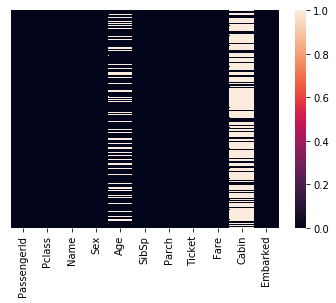

In [0]:
#Visualising null data in each feature with heat map
sns.heatmap(train.isnull(), yticklabels=False, cbar=True)

In [0]:
train[['Pclass','Age']].groupby(['Pclass'],as_index=False).mean().sort_values(['Age'],ascending=False)

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


In [0]:
#Define a function which replace age with most specific value
def replace_nan_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else: 
        return Age

In [0]:
#Replace null data of age column according to Pclass column that is most correlated together
train['Age'] = train[['Age','Pclass']].apply(replace_nan_age, axis=1)

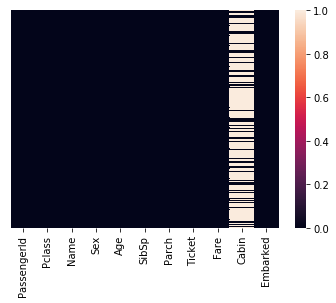

In [0]:
#Visualising null data in each feature with heat map
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

In [0]:
#Drop Cabin column
train.drop(columns='Cabin',axis=1,inplace=True)

KeyError: ignored

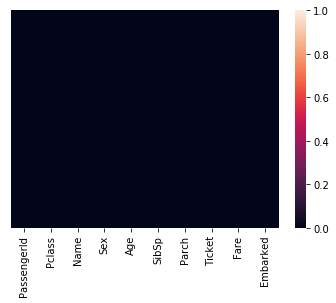

In [0]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True)

In [0]:
#Drop Name Ticket column to get with numerical values
train.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [0]:
#Applying onehot encoding with Sex column
Sex = pd.get_dummies(train['Sex'],drop_first=True)
train = pd.concat([train,Sex],axis=1)
train.drop(['Sex'],axis=1,inplace=True)

In [0]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:

#Applying onehot encoding on Embarked feature


Embarked=pd.get_dummies(train['Embarked'])
train=pd.concat([train,Embarked],axis=1)
train.drop(['Embarked'],axis=1,inplace=True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 45.3 KB


In [0]:
#All features are converted in numerical values and now look our training data
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,0,1


In [0]:
#Similarly Applying feature engineering on test data
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [0]:
#Applying Onehot Encoding on Sex feature
Sex = pd.get_dummies(test['Sex'],drop_first=True)
test = pd.concat([test,Sex],axis=1)
test.drop(['Sex'],axis=1,inplace=True)

In [0]:
#Applying onehot encoding on Embarked feature
Embarked=pd.get_dummies(test['Embarked'])
test=pd.concat([test,Embarked],axis=1)
test.drop(['Embarked'],axis=1,inplace=True)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 21.3 KB


In [0]:
#All features are converted in numerical values and now look our training data
test.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211,0.023245,-0.027419,-0.035731,0.048008
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147,0.108615,-0.318543,0.252608,0.120783
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932,0.000013,0.180601,-0.017956,-0.158295
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539,-0.099943,-0.016365,-0.098824,0.079367
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046,-0.159120,-0.005791,-0.132948,0.092201
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000,-0.191514,0.312161,-0.155562,-0.178582
male,0.023245,0.108615,0.000013,-0.099943,-0.159120,-0.191514,1.000000,-0.033684,-0.115574,0.105883
C,-0.027419,-0.318543,0.180601,-0.016365,-0.005791,0.312161,-0.033684,1.000000,-0.199786,-0.767375
Q,-0.035731,0.252608,-0.017956,-0.098824,-0.132948,-0.155562,-0.115574,-0.199786,1.000000,-0.474962
S,0.048008,0.120783,-0.158295,0.079367,0.092201,-0.178582,0.105883,-0.767375,-0.474962,1.000000


In [0]:
#Here we see age column is more correlated with Pclass as compare to Sex(male) feature
test[['Pclass','Age']].groupby(['Pclass'],as_index=False).mean().sort_values(['Age'],ascending=False)

,Pclass,Age
0,1,40.918367
1,2,28.777500
2,3,24.027945


In [0]:
train[['male','Age']].groupby(['male'],as_index=False).mean().sort_values(['Age'],ascending=False)

,male,Age
1,1,30.047088
0,0,27.828025


In [0]:
#So we go through Pclass cloumn to replace age with its most specific values by defininig function
def replace_nan_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if(pd.isnull(Age)):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age

In [0]:
test['Age'] = test[['Age','Pclass']].apply(replace_nan_age, axis=1)

In [0]:
#Replace NaN value of Fare column with its mean value
test.replace(np.nan,test['Fare'].mean(),inplace=True)

In [0]:
#Now we see all values are filled and all are numerical values
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 21.3 KB


In [0]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 10)


In [0]:
#Modeling¶
#Applying Random Forest Algorthm

#Now Spliting Data into training and validation data
x_trn,x_valid,y_trn,y_valid=train_test_split(train,y_train,test_size=0.33,random_state=150)

In [0]:
model=RandomForestClassifier(n_estimators=200,random_state=200,max_features=0.5,min_samples_leaf=3,oob_score=True,n_jobs=-1)
model.fit(train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=200, verbose=0,
                       warm_start=False)

In [0]:
#Our Score on Validation Data
model.score(x_valid,y_valid)

0.9389830508474576

In [0]:
#Prediction on Test Set
predict_y = model.predict(test)

In [0]:
#Our Score on Training data
model.score(x_trn,y_trn)

0.912751677852349

Feature ranking:
1. feature 6 (0.350956)
2. feature 5 (0.178360)
3. feature 2 (0.139972)
4. feature 0 (0.131834)
5. feature 1 (0.110142)
6. feature 3 (0.039125)
7. feature 4 (0.018399)
8. feature 9 (0.014992)
9. feature 7 (0.010296)
10. feature 8 (0.005924)


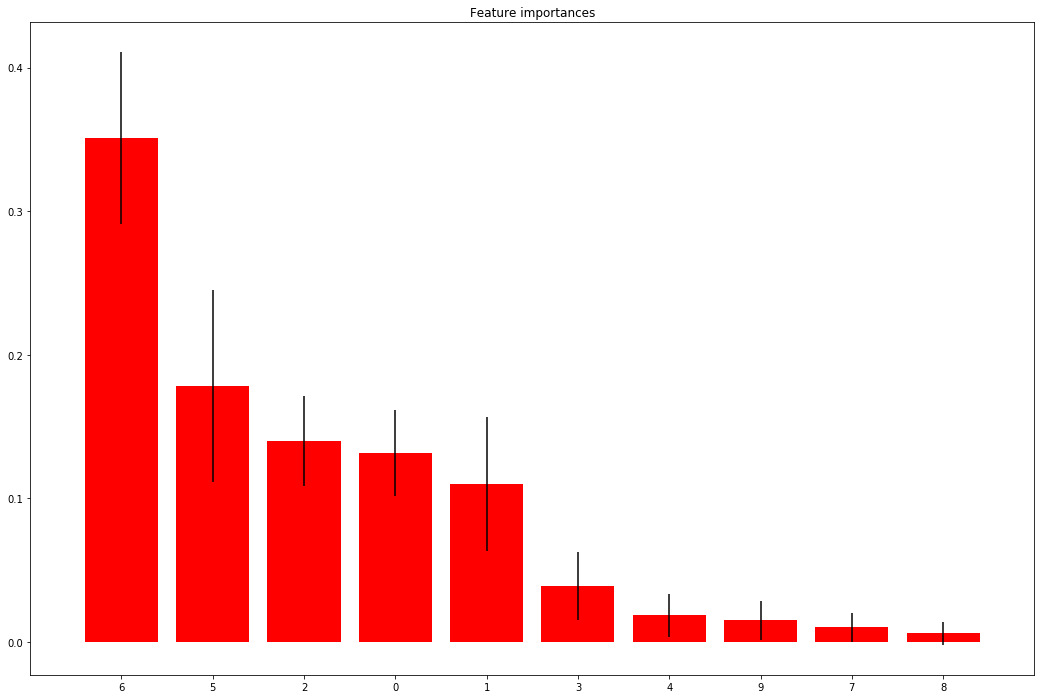

In [0]:
#Finally view our feature importance value of all features
model.feature_importances_
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_trn.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,12))
plt.title("Feature importances")
plt.bar(range(x_trn.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_trn.shape[1]), indices)
plt.xlim([-1, x_trn.shape[1]])
plt.show()

In [0]:
#Prepare our Submission file
my_submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predict_y })
my_submission.to_csv('submission.csv', index=False)

In [0]:
!kaggle competitions submit -c titanic2019 -f submission.csv -m "BOOTCAMP"

100% 2.77k/2.77k [00:00<00:00, 10.8kB/s]
Successfully submitted to DSN Pre-AI Bootcamp Titanic Survival Prediction

In [0]:
#!kaggle competitions list -s Pre-AI Bootcamp Titanic Survival Prediction

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: unrecognized arguments: Bootcamp Titanic Survival Prediction
